<a href="https://colab.research.google.com/github/YG2312/eCommerce-EDA-Lookalike-Clustering/blob/main/Yash_Gupta_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge customer and transaction data
merged_data = transactions.merge(customers, on='CustomerID')

# Aggregate transaction data by customer
customer_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

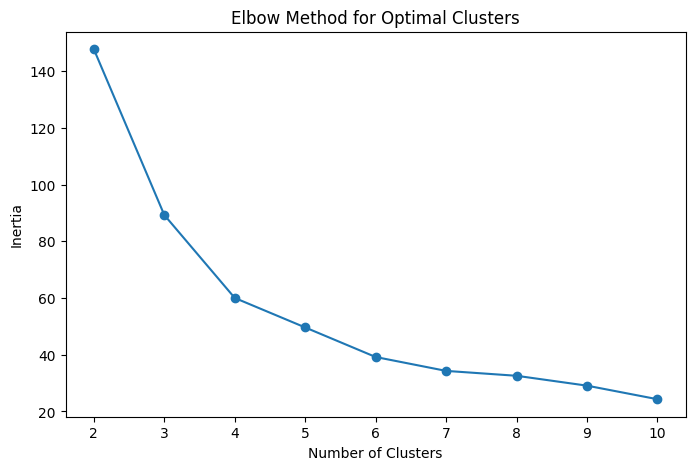

Davies-Bouldin Index: 0.72127971818163


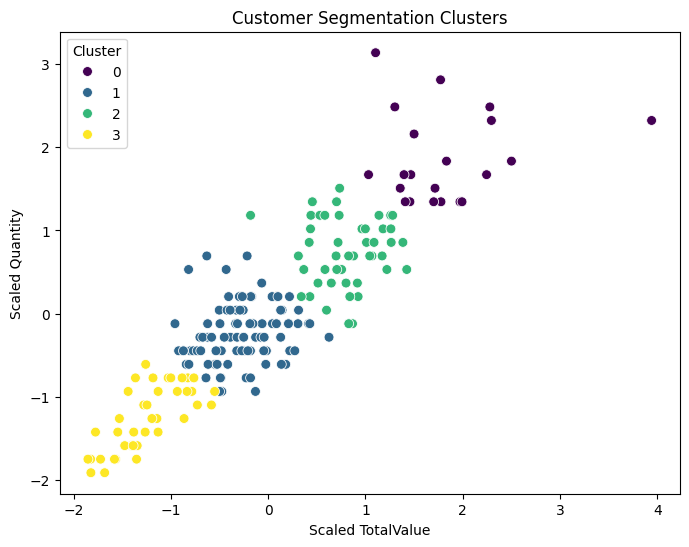

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.iloc[:, 1:])

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform clustering with optimal clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
customer_data['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=customer_data['Cluster'],
    palette='viridis',
    s=50
)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Scaled TotalValue')
plt.ylabel('Scaled Quantity')
plt.legend(title='Cluster')
plt.show()

# Save clustered data to CSV
customer_data.to_csv('Customer_Segmentation.csv', index=False)